In [55]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [92]:
exp_type = 'simulation'
exp = 'pv'
exp_name = '2024_03_06-11_51_46' #pv
#exp_name = '2024_02_21-14_06' #10C

**Prepare structures and functions to plot everything we need**

In [93]:
folder_exp_dict = {'pv': 'PV_profile', '20C': '20C_check_up', '10C': '10C_check_up'}

In [94]:
folder = "../data/output/" + exp_type + '/'
folder_path = Path(folder)

ground_file = folder_path / folder_exp_dict[exp] / exp_name / 'ground.csv'
output_file = folder_path / folder_exp_dict[exp] / exp_name / 'dataset.csv'

In [95]:
def plot_compared_data(dfs, 
                       variables: list, 
                       x_axes: list,
                       labels: list, 
                       x_label: str,
                       y_label: str,
                       markers: list,
                       title: str, 
                       colors=None, 
                       save_fig=False, 
                       fig_name=''
                      ):
    if not colors:
        colors = ['violet', 'cyan', 'purple', 'magenta']
        
    plt.figure(figsize=(15,5))
    
    # Command for the grid
    plt.grid(visible=True, which='major', color='gray', alpha=0.25, linestyle='dashdot', lw=1.5)
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='beige', alpha=0.5, ls='-', lw=1)
    
    # Plot iteratively all the variables
    for i, df in enumerate(dfs):
        #plt.scatter(df[x_axes[i]], df[variables[i]], label=labels[i], color=colors[i], marker=markers[i], s=0.1, rasterized=True)
        plt.plot(df[x_axes[i]], df[variables[i]], label=labels[i], color=colors[i], marker=markers[i], markevery=5000)
    
    plt.ticklabel_format(style='plain')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.title(title)
    plt.legend()
    
    if save_fig:
        plt.savefig(fig_name, format='svg', transparent=True, dpi=200)
    
    plt.show()

### RETRIEVE SIMULATION AND GROUND DATA

In [96]:
df_out = pd.read_csv(output_file)
df_out = df_out.iloc[1:]
df_out

,time,soc,soh,voltage,current,power,Vocv,R0,R1,C,temperature,heat
1,0.0,0.200000,1.0,3.591619,-0.232431,-0.827453,3.590947,0.002887,0.003891,32246.302169,295.879726,0.000156
2,0.1,0.199999,1.0,3.591614,-0.230384,-0.827453,3.590947,0.002887,0.003891,32246.212874,295.879452,0.000153
3,0.2,0.199999,1.0,3.591615,-0.230385,-0.827453,3.590947,0.002887,0.003891,32246.123973,295.879179,0.000153
4,0.3,0.199999,1.0,3.591615,-0.230385,-0.827453,3.590947,0.002887,0.003891,32246.035090,295.878905,0.000153
5,0.4,0.199998,1.0,3.591616,-0.230385,-0.827453,3.590947,0.002887,0.003891,32245.946225,295.878632,0.000153
...,...,...,...,...,...,...,...,...,...,...,...,...
777597,86399.5,0.578848,1.0,3.744337,-0.231306,-0.866088,3.742905,0.002854,0.002953,28072.228530,295.143339,0.000354
777598,86399.6,0.578847,1.0,3.744337,-0.231306,-0.866088,3.742905,0.002854,0.002953,28072.228314,295.143340,0.000354
777599,86399.7,0.578847,1.0,3.744336,-0.231306,-0.866088,3.742905,0.002854,0.002953,28072.228098,295.143341,0.000354
777600,86399.8,0.578847,1.0,3.744336,-0.231306,-0.866088,3.742905,0.002854,0.002953,28072.227882,295.143341,0.000354


In [97]:
df_ground = pd.read_csv(ground_file)
df_ground 

,current,voltage,temperature,power,time
0,-0.2322,3.5641,295.9180,-0.827453,0.0
1,-0.2322,3.5641,295.9180,-0.827453,0.1
2,-0.2322,3.5641,295.9180,-0.827453,0.2
3,-0.2322,3.5641,295.9180,-0.827453,0.3
4,-0.2322,3.5641,295.9180,-0.827453,0.4
...,...,...,...,...,...
777596,-0.2322,3.7305,295.1321,-0.866088,86399.5
777597,-0.2322,3.7305,295.1321,-0.866088,86399.6
777598,-0.2322,3.7305,295.1321,-0.866088,86399.7
777599,-0.2322,3.7305,295.1321,-0.866088,86399.8


### PLOT COMPARED DATA

In [98]:
args_20c = {
    'dfs': [df_out, df_ground], 
    'variables': ['voltage', 'voltage'], 
    'x_axes': ['time', 'time'],
    'labels': ['Simulated', 'Ground'],
    'x_label': 'Time [s]',
    'y_label': '[°C]',
    'markers': ['o', 's'],
    'title': 'Voltage Accuracy',
    'save_fig': False,
    'fig_name': '20C_V.svg'
}

In [99]:
args_10c = {
    'dfs': [df_out, df_ground], 
    'variables': ['voltage', 'voltage'], 
    'x_axes': ['time', 'time'],
    'labels': ['Simulated', 'Ground'],
    'x_label': 'Time [s]',
    'y_label': '[°C]',
    'markers': ['o', 's'],
    'title': 'Voltage Accuracy',
    'save_fig': False,
    'fig_name': '20C_V.svg'
}

In [100]:
args_pv = {
    'dfs': [df_out, df_ground], 
    'variables': ['voltage', 'voltage'], 
    'x_axes': ['time', 'time'],
    'labels': ['Simulated', 'Ground'],
    'x_label': 'Time [s]',
    'y_label': '[V]',
    'markers': ['o', 's'],
    'title': 'Voltage Accuracy',
    'save_fig': False,
    'fig_name': 'PV_V.svg'
}

In [101]:
args = {'pv': args_pv, '10C': args_10c, '20C': args_20c}

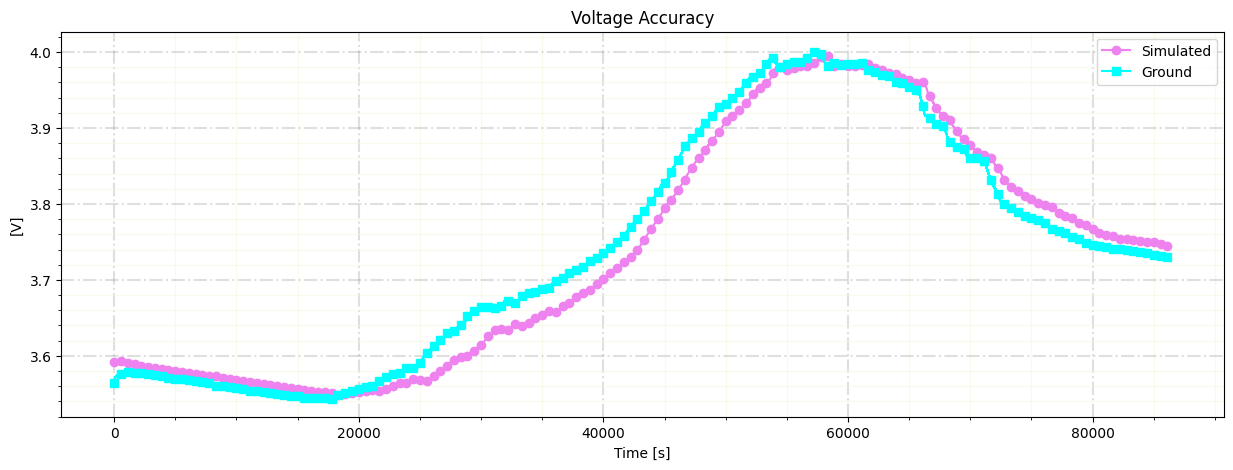

In [102]:
plot_compared_data(**args[exp])